In [ ]:
!pip install mediapipe


In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimag


import mediapipe as mp




# Face oval

In [ ]:

Im=cv2.imread('image.jpg')
img = cv2.cvtColor(Im, cv2.COLOR_BGR2RGB)


mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
landmarks = results.multi_face_landmarks[0]
face_oval = mp_face_mesh.FACEMESH_FACE_OVAL
 
import pandas as pd
df = pd.DataFrame(list(face_oval), columns = ['p1','p2'])

routes_idx = []
 
p1 = df.iloc[0]['p1']   # the first points 
p2 = df.iloc[0]['p2']
 
for i in range(0, df.shape[0]):
     
    #print(p1, p2)
     
    obj = df[df['p1'] == p2]   # order them
    p1 = obj['p1'].values[0]
    p2 = obj['p2'].values[0]
     
    route_idx = []
    route_idx.append(p1)
    route_idx.append(p2)
    routes_idx.append(route_idx)
 
# -------------------------------
 
for route_idx in routes_idx:
    print('Draw a line between '+ str(route_idx[0]) +'th landmark point to' +str(route_idx[1])+' th landmark')

routes = []
 
for source_idx, target_idx in routes_idx:
     
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
         
    relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
    relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
 
    #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
     
    routes.append(relative_source)
    routes.append(relative_target)
mask = np.zeros((img.shape[0], img.shape[1]))
mask = cv2.fillConvexPoly(mask, np.array(routes), 1)

mask = mask.astype(bool)  
out = np.zeros_like(img)
out[mask] = img[mask]

plt.imshow(out)

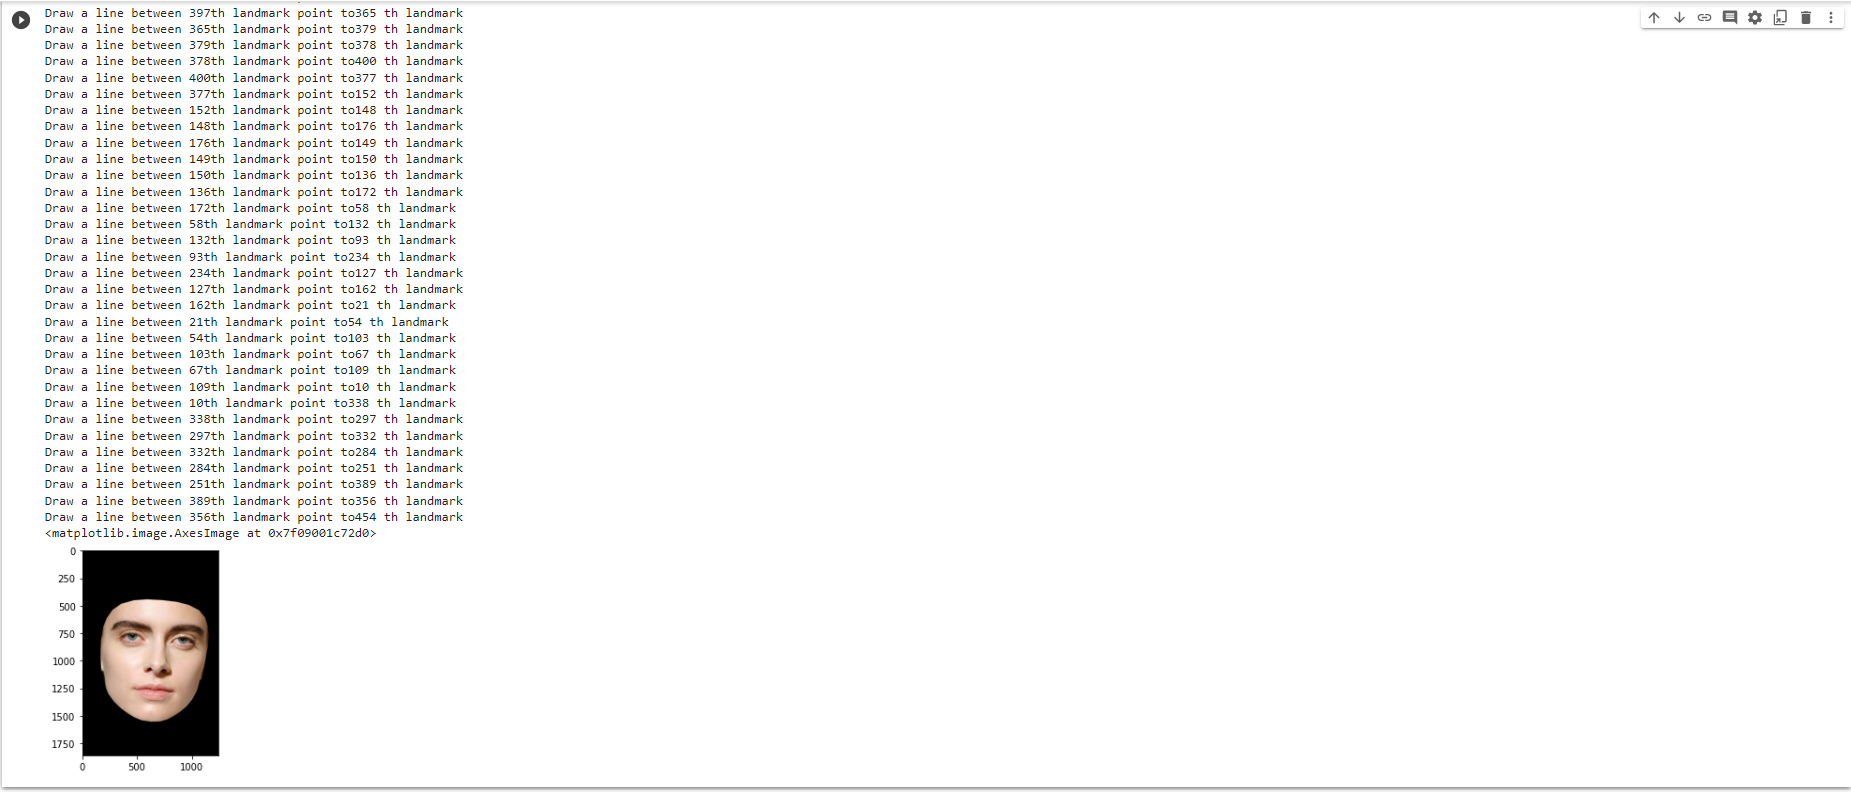

# face 4 regions  

In [ ]:
def face_regions(image):
  D={}
  Im = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #resizing the image 
  width = 512
  height = 512
  dim = (width, height)
  img = cv2.resize(Im, dim, interpolation = cv2.INTER_AREA)

  mp_face_mesh = mp.solutions.face_mesh
  face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)
  results = face_mesh.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  landmarks = results.multi_face_landmarks[0]
  land_marks=list()

  l=[70,71,21,54,103,67,109,10,338,297,332,301,300,293,334,296,336,9,107,66,105,63,70]
  for i in range(len(l)-1):
    A=()
    A=(l[i],l[i+1])
    land_marks.append(A)
  face_oval = mp_face_mesh.FACEMESH_FACE_OVAL
  
  import pandas as pd
  df = pd.DataFrame(land_marks, columns = ['p1','p2'])
  routes_idx = []
  
  p1 = df.iloc[0]['p1']   # the first points 
  p2 = df.iloc[0]['p2']
  
  for i in range(0, df.shape[0]):
      
      #print(p1, p2)
      
      obj = df[df['p1'] == p2]   # order them
      p1 = obj['p1'].values[0]
      p2 = obj['p2'].values[0]
      
      route_idx = []
      route_idx.append(p1)
      route_idx.append(p2)
      routes_idx.append(route_idx)
  
  routes = []
  
  for source_idx, target_idx in routes_idx:
      
      source = landmarks.landmark[source_idx]
      target = landmarks.landmark[target_idx]
      if source_idx in [21,54,103,67,109,10,338,297,332]:    
        relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y-50))
        relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y-50))
      else:
        relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
        relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))      
  
      #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
      
      routes.append(relative_source)
      routes.append(relative_target)

  mask = np.zeros((img.shape[0], img.shape[1]))
  mask = cv2.fillConvexPoly(mask, np.array(routes), 1)

  mask = mask.astype(bool)  
  Forehead = np.zeros_like(img)
  Forehead[mask] = img[mask]

  land_marks=list()
  l=[356,372,265,261,448,449,348,329,371,391,322,410,436,427,411,376,366,447,356]

  for i in range(len(l)-1):
    A=()
    A=(l[i],l[i+1])
    land_marks.append(A)
  face_oval = mp_face_mesh.FACEMESH_FACE_OVAL
  
  import pandas as pd
  df = pd.DataFrame(land_marks, columns = ['p1','p2'])
  routes_idx = []
  
  p1 = df.iloc[0]['p1']   # the first points 
  p2 = df.iloc[0]['p2']
  
  for i in range(0, df.shape[0]):
      
      #print(p1, p2)
      
      obj = df[df['p1'] == p2]   # order them
      p1 = obj['p1'].values[0]
      p2 = obj['p2'].values[0]
      
      route_idx = []
      route_idx.append(p1)
      route_idx.append(p2)
      routes_idx.append(route_idx)
  
  routes = []
  
  for source_idx, target_idx in routes_idx:
      
      source = landmarks.landmark[source_idx]
      target = landmarks.landmark[target_idx]
          
      relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
      relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
  
      #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
      
      routes.append(relative_source)
      routes.append(relative_target)

  mask = np.zeros((img.shape[0], img.shape[1]))
  mask = cv2.fillConvexPoly(mask, np.array(routes), 1)

  mask = mask.astype(bool)  
  Left_cheek = np.zeros_like(img)
  Left_cheek[mask] = img[mask]

  land_marks=list()
  l=[127,143, 35, 31 ,228, 229, 119 ,100 ,142, 129 ,167, 165 ,92, 186, 216, 207, 187, 147 ,137,227,127]
  l+[229]*len(l)
  for i in range(len(l)-1):
    A=()
    A=(l[i],l[i+1])
    land_marks.append(A)
  face_oval = mp_face_mesh.FACEMESH_FACE_OVAL
  
  import pandas as pd
  df = pd.DataFrame(land_marks, columns = ['p1','p2'])
  routes_idx = []
  
  p1 = df.iloc[0]['p1']   # the first points 
  p2 = df.iloc[0]['p2']
  
  for i in range(0, df.shape[0]):
      
      #print(p1, p2)
      
      obj = df[df['p1'] == p2]   # order them
      p1 = obj['p1'].values[0]
      p2 = obj['p2'].values[0]
      
      route_idx = []
      route_idx.append(p1)
      route_idx.append(p2)
      routes_idx.append(route_idx)
  
  routes = []
  
  for source_idx, target_idx in routes_idx:
      
      source = landmarks.landmark[source_idx]
      target = landmarks.landmark[target_idx]
          
      relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
      relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
  
      #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
      
      routes.append(relative_source)
      routes.append(relative_target)

  mask = np.zeros((img.shape[0], img.shape[1]))
  mask = cv2.fillConvexPoly(mask, np.array(routes), 1)

  mask = mask.astype(bool)  
  Right_cheek = np.zeros_like(img)
  Right_cheek[mask] = img[mask]

  land_marks=list()
  l=[9,55, 221, 189 ,245, 188, 174 ,198 ,129,203, 98 ,97, 2 ,326, 327,423,266,371, 420, 456 ,399,412,465,413, 441 ,285,9]
  l+[229]*len(l)
  for i in range(len(l)-1):
    A=()
    A=(l[i],l[i+1])
    land_marks.append(A)
  face_oval = mp_face_mesh.FACEMESH_FACE_OVAL
  import pandas as pd
  df = pd.DataFrame(land_marks, columns = ['p1','p2'])
  routes_idx = []
  p1 = df.iloc[0]['p1']   # the first points 
  p2 = df.iloc[0]['p2']
  
  for i in range(0, df.shape[0]):
      
      #print(p1, p2)
      
      obj = df[df['p1'] == p2]   # order them
      p1 = obj['p1'].values[0]
      p2 = obj['p2'].values[0]
      
      route_idx = []
      route_idx.append(p1)
      route_idx.append(p2)
      routes_idx.append(route_idx)
  
  routes = []
  
  for source_idx, target_idx in routes_idx:
      
      source = landmarks.landmark[source_idx]
      target = landmarks.landmark[target_idx]
          
      relative_source = (int(img.shape[1] * source.x), int(img.shape[0] * source.y))
      relative_target = (int(img.shape[1] * target.x), int(img.shape[0] * target.y))
  
      #cv2.line(img, relative_source, relative_target, (255, 255, 255), thickness = 2)
      
      routes.append(relative_source)
      routes.append(relative_target)

  mask = np.zeros((img.shape[0], img.shape[1]))
  mask = cv2.fillConvexPoly(mask, np.array(routes), 1)

  mask = mask.astype(bool)  
  Nose = np.zeros_like(img)
  Nose[mask] = img[mask]


  D['Nose']=Nose
  D['Left_cheek']=Left_cheek
  D['Right_cheek']=Right_cheek
  D['Forehead']=Forehead

  return(D)


In [ ]:
im=cv2.imread('image.jpg')

D=face_regions(im)
Nose=D['Nose']
Left_cheek=D['Left_cheek']
Right_cheek=D['Right_cheek']
Forehead=D['Forehead']

In [ ]:
f, axarr = plt.subplots(2,3)
axarr[0,0].imshow(Nose)
axarr[0,0].set(title='Nose')
axarr[0,1].imshow(Forehead)
axarr[0,1].set(title='Nose')

axarr[1,0].imshow(Right_cheek)
axarr[1,0].set(title='Nose')

axarr[1,1].imshow(Left_cheek)
axarr[1,1].set(title='Nose')
axarr[1,2].imshow(img)
axarr[1,2].set(title='Full face')

axarr[0,2].imshow(out)
axarr[0,2].set(title='face oval')

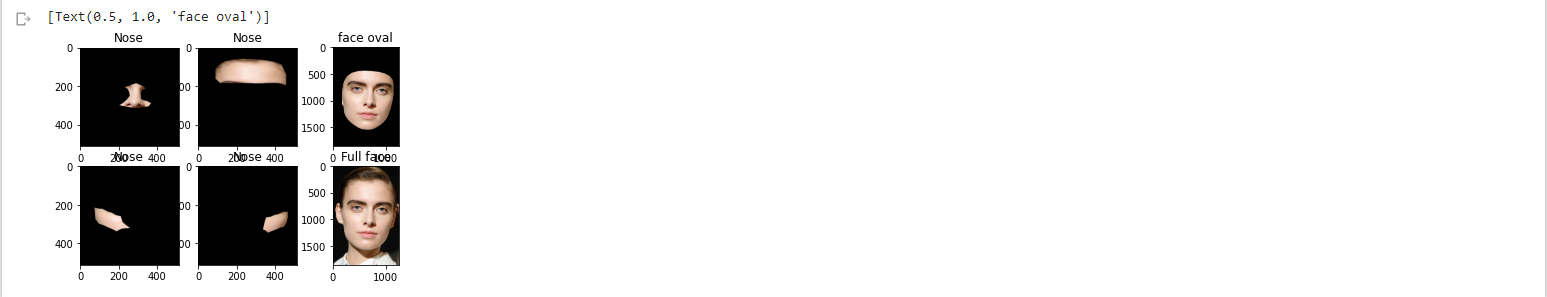